Import necessary libraries

In [65]:
import os
import pandas as pd
import dask.dataframe as dd




Path to csv files 

In [66]:
folder_path = r'C:\Users\sukri\Desktop\School Year 2023-2024\MakaAI\CAS-102013-082023'


Reads header file, coverts column names to list

In [67]:
header_file_path = os.path.join(folder_path, 'CRT_Header_File.csv')
header_df = pd.read_csv(header_file_path, encoding='unicode_escape')
header = header_df.columns.tolist()

Creates a dataframe with the column names from header file

In [68]:
stacked_df = pd.DataFrame(columns=header)


Gets all csv files in path

In [69]:
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]


In [70]:
csv_files.sort()


Reads first 12 csv files, appends to stacked dataframe

In [71]:
for csv_file in csv_files[:12]:
    data_file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(data_file_path, sep='|', names=header, na_values=['', 'NA'])
    df.fillna('NA', inplace=True)
    stacked_df = pd.concat([stacked_df, df], ignore_index=True)


C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\3250384515.py:3: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file_path, sep='|', names=header, na_values=['', 'NA'])
C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\3250384515.py:3: DtypeWarning: Columns (42,82,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file_path, sep='|', names=header, na_values=['', 'NA'])
C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\3250384515.py:3: DtypeWarning: Columns (42,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file_path, sep='|', names=header, na_values=['', 'NA'])
C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\3250384515.py:3: DtypeWarning: Columns (42,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file_path, sep='|', names=header, na_values=['', 'N

In [72]:
stacked_df.head()

,Reference Pool ID,Loan Identifier,Monthly Reporting Period,Channel,Seller Name,Servicer Name,Master Servicer,Original Interest Rate,Current Interest Rate,Original UPB,...,Mortgage Margin,ARM Balloon Indicator,ARM Plan Number,Borrower Assistance Plan,High Loan to Value (HLTV) Refinance Option Indicator,Deal Name,Repurchase Make Whole Proceeds Flag,Alternative Delinquency Resolution,Alternative Delinquency Resolution Count,Total Deferral Amount
0,1501,90000001,112017,C,"Flagstar Bank, FSB","Flagstar Bank, FSB",FANNIE MAE,4.375,4.375,232000.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,1501,90000002,112017,R,Other,Matrix Financial Services Corporation,FANNIE MAE,4.000,4.0,236000.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1501,90000003,112017,C,Other,Other,FANNIE MAE,4.500,4.5,95000.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1501,90000004,112017,R,"Movement Mortgage, LLC",Matrix Financial Services Corporation,FANNIE MAE,4.625,4.625,388000.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1501,90000005,112017,C,"Wells Fargo Bank, N.A.","Wells Fargo Bank, N.A.",FANNIE MAE,4.500,4.5,248000.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Gets dimensions of dataframe

In [73]:
stacked_df.shape

(2238300, 108)

In [74]:
stacked_df['prepay']="N"


C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\264085379.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stacked_df['prepay']="N"


Where the Zero Balance Code = 1, set prepay to Y

Zero Balance code is code that indicates why loan is 0 

In [75]:
stacked_df.loc[stacked_df['Zero Balance Code'] == 1, 'prepay'] = "Y"


In [76]:
stacked_df['Zero Balance Code']

0           NA
1           NA
2           NA
3           NA
4           NA
          ... 
2238295    1.0
2238296     NA
2238297    1.0
2238298     NA
2238299    1.0
Name: Zero Balance Code, Length: 2238300, dtype: object

In [77]:
unique_values = stacked_df['Zero Balance Code'].unique()


Gets the unique valeues of the codes in Zero Balance Code

In [78]:
unique_values

array(['NA', 1.0, 96.0, 6.0, 9.0, 2.0, 3.0, 16.0, 15.0], dtype=object)

In [79]:
code_counts = stacked_df['Zero Balance Code'].value_counts()


According to Fannie Mae website codes correspond to: 

01 = Prepaid or Matured
02 = Third Party Sale
03 = Short Sale
06 = Repurchased
09 = Deed-in-Lieu; REO Disposition
15 = Notes Sales
16 = Reperforming Loan Sale
96 = Removal (non-credit event)
Applies to all CAS deals prior to and including 2015-C03:
97 = Delinquency (credit event due to D180)
98 = Other Credit Event

Gets count of each code in Zero Balance Code

In [80]:
for code in unique_values:
    count = code_counts[code]
    print(f"Code {code}: Count = {count}")

Code NA: Count = 1440037
Code 1.0: Count = 794069
Code 96.0: Count = 2620
Code 6.0: Count = 687
Code 9.0: Count = 308
Code 2.0: Count = 200
Code 3.0: Count = 48
Code 16.0: Count = 260
Code 15.0: Count = 71


In [81]:
unique_vals = stacked_df["prepay"].unique()
prepay_counts = stacked_df['prepay'].value_counts()


In [82]:
unique_vals

array(['N', 'Y'], dtype=object)

Gets unique values and counts of prepay column

In [83]:
for val in unique_vals:
    count = prepay_counts[val]
    print(f"Code {val}: Count = {count}")

Code N: Count = 1444231
Code Y: Count = 794069


Groups monthly reporting period by size 

In [84]:
stacked_df.groupby('Monthly Reporting Period').size()

Monthly Reporting Period
112017    186525
112018    186525
112019    186525
112020    186525
112021    186525
112022    186525
122017    186525
122018    186525
122019    186525
122020    186525
122021    186525
122022    186525
dtype: int64

Creates new column that converts monthly reporting period column to proper data format

In [85]:
stacked_df['reporting_period'] = pd.to_datetime(stacked_df['Monthly Reporting Period'].astype(str), format='%m%Y')

C:\Users\sukri\AppData\Local\Temp\ipykernel_25072\1940552448.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stacked_df['reporting_period'] = pd.to_datetime(stacked_df['Monthly Reporting Period'].astype(str), format='%m%Y')


In [86]:
stacked_df['reporting_period'].unique()

array(['2017-11-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2022-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [87]:
stacked_df.groupby(['reporting_period','prepay']).size()

reporting_period  prepay
2017-11-01        N         186525
2017-12-01        N         185392
                  Y           1133
2018-11-01        N         173590
                  Y          12935
2018-12-01        N         172732
                  Y          13793
2019-11-01        N         151293
                  Y          35232
2019-12-01        N         148923
                  Y          37602
2020-11-01        N         100507
                  Y          86018
2020-12-01        N          95961
                  Y          90564
2021-11-01        N          63019
                  Y         123506
2021-12-01        N          61266
                  Y         125259
2022-11-01        N          52659
                  Y         133866
2022-12-01        N          52364
                  Y         134161
dtype: int64

In [88]:
stacked_df["Current Actual UPB"]

0          229722.24
1          234881.62
2           94479.62
3          384968.45
4          245526.03
             ...    
2238295         0.00
2238296     96558.76
2238297         0.00
2238298    308248.48
2238299         0.00
Name: Current Actual UPB, Length: 2238300, dtype: float64

Displaying basic info about dataset

In [89]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238300 entries, 0 to 2238299
Columns: 110 entries, Reference Pool ID to reporting_period
dtypes: datetime64[ns](1), float64(6), object(103)
memory usage: 1.8+ GB


In [90]:
stacked_df.describe()

,Original Interest Rate,Original UPB,UPB at Issuance,Current Actual UPB,Cumulative Modification Loss Amount,Cumulative Credit Event Net Gain or Loss
count,2.238300e+06,2.238300e+06,2.238300e+06,2.238300e+06,2.238300e+06,2.238300e+06
mean,4.377809e+00,2.438257e+05,2.409014e+05,1.423023e+05,1.809045e+00,3.582695e+00
std,3.660537e-01,1.229430e+05,1.222128e+05,1.417343e+05,1.019355e+02,4.591742e+02
min,3.125000e+00,1.200000e+04,5.390770e+03,0.000000e+00,0.000000e+00,-9.459901e+04
25%,4.125000e+00,1.480000e+05,1.460381e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.330000e+00,2.230000e+05,2.193503e+05,1.234188e+05,0.000000e+00,0.000000e+00
75%,4.625000e+00,3.210000e+05,3.178772e+05,2.354730e+05,0.000000e+00,0.000000e+00
max,6.125000e+00,1.223000e+06,1.218732e+06,1.218732e+06,2.445913e+04,1.226971e+05


In [91]:
numeric_df = stacked_df.select_dtypes(include='number')

In [92]:
numeric_df.columns

Index(['Original Interest Rate', 'Original UPB', 'UPB at Issuance',
       'Current Actual UPB', 'Cumulative Modification Loss Amount',
       'Cumulative Credit Event Net Gain or Loss'],
      dtype='object')

In [93]:
correlation= stacked_df['Original UPB'].corr(stacked_df['Current Actual UPB'])

In [94]:
print(correlation)

0.42764113812529836


Cleaning up data

In [95]:
stacked_df = stacked_df.dropna(subset=['Loan Age'])
stacked_df = stacked_df.dropna(subset=['Zero Balance Code'])
stacked_df = stacked_df[stacked_df['Zero Balance Code'] != "NA"]



In [98]:
stacked_df["Zero Balance Code"].unique()

array([1.0, 96.0, 6.0, 9.0, 2.0, 3.0, 16.0, 15.0], dtype=object)

In [107]:
stacked_df["Original Interest Rate"].unique()

array([4.875, 4.5  , 4.125, 4.   , 4.375, 4.625, 3.875, 5.   , 4.25 ,
       5.375, 4.75 , 4.56 , 5.125, 4.225, 5.25 , 4.99 , 5.5  , 3.75 ,
       5.139, 3.99 , 4.24 , 4.15 , 4.2  , 3.925, 6.   , 4.95 , 3.375,
       4.55 , 5.08 , 3.625, 4.18 , 4.1  , 5.875, 6.125, 4.06 , 4.58 ,
       5.1  , 5.625, 5.75 , 4.633, 4.175, 5.098, 3.975, 4.611, 3.999,
       4.959, 4.572, 3.95 , 4.3  , 4.74 , 4.865, 4.887, 4.49 , 4.115,
       4.365, 4.543, 4.075, 4.7  , 4.157, 4.701, 3.8  , 3.615, 4.499,
       4.8  , 4.6  , 4.588, 3.5  , 3.826, 4.83 , 5.104, 4.925, 4.45 ,
       4.025, 3.865, 4.035, 5.2  , 4.386, 4.275, 4.498, 3.7  , 4.245,
       4.73 , 4.281, 4.372, 4.09 , 5.153, 4.34 , 4.91 , 4.975, 4.265,
       4.05 , 4.299, 5.115, 5.122, 4.775, 4.109, 4.44 , 4.336, 4.717,
       4.314, 4.669, 4.54 , 4.19 , 4.067, 4.874, 4.054, 5.05 , 4.703,
       4.306, 4.575, 4.303, 4.423, 4.021, 5.028, 4.4  , 4.812, 4.35 ,
       4.928, 4.615, 4.169, 4.438, 5.187, 4.72 , 4.599, 4.699, 4.249,
       4.29 , 3.956,

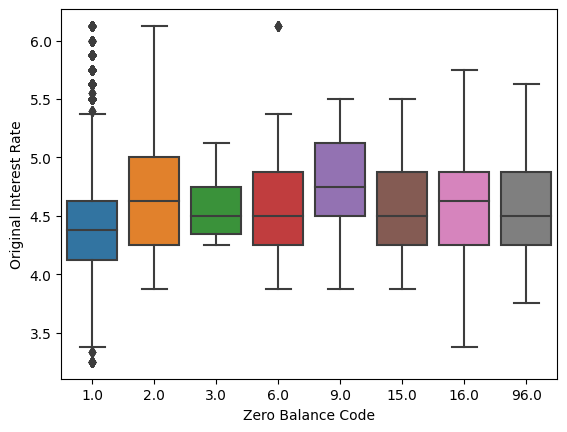

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Zero Balance Code', y='Original Interest Rate', data=stacked_df)
plt.show()


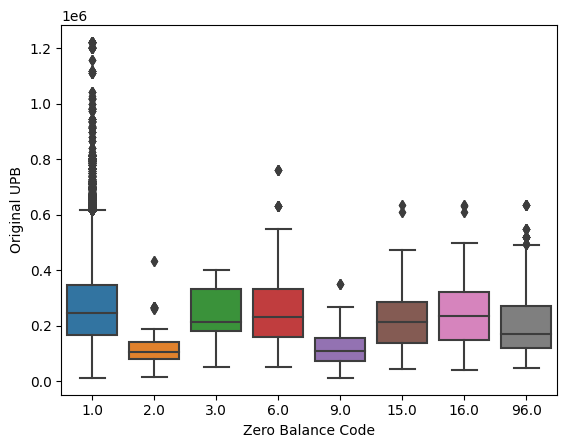

In [132]:
sns.boxplot(x='Zero Balance Code', y='Original UPB', data=stacked_df)
plt.show()


In [138]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(stacked_df['Zero Balance Code'], stacked_df['prepay'])
chi2, p, _, _ = chi2_contingency(contingency_table)

In [140]:
chi2

798263.0000000001

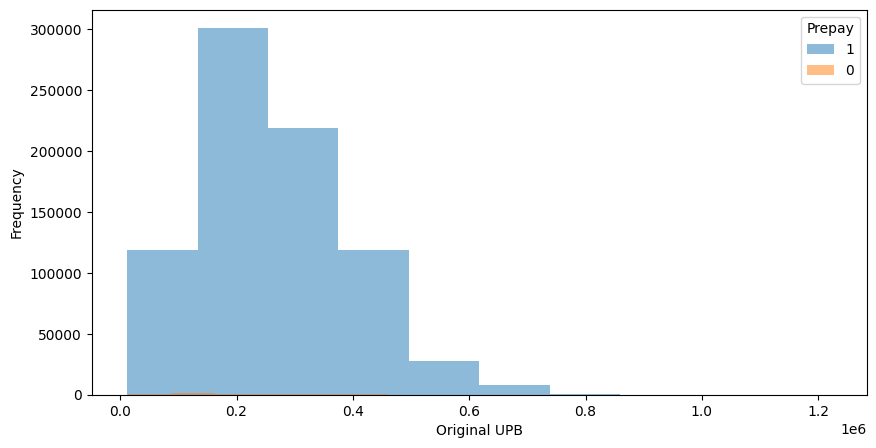

In [158]:

# Create histograms
plt.figure(figsize=(10, 5))
for category in stacked_df['prepay'].unique():
    subset = stacked_df[stacked_df['prepay'] == category]
    plt.hist(subset['Original UPB'], alpha=0.5, label=str(category))

plt.xlabel('Original UPB')
plt.ylabel('Frequency')
plt.legend(title='Prepay')
plt.show()


In [169]:
stacked_df["First Time Home Buyer Indicator"].unique()

array(['N', 'Y'], dtype=object)

In [171]:
home_counts = stacked_df['First Time Home Buyer Indicator'].value_counts()

In [172]:
home_counts

N    663032
Y    135231
Name: First Time Home Buyer Indicator, dtype: int64

In [175]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(stacked_df['First Time Home Buyer Indicator'], stacked_df['prepay'])
chi2, p, _, _ = chi2_contingency(contingency_table)

In [176]:
p

0.003381163941534699